<a href="https://colab.research.google.com/github/pranavgaonkar12/My-programs/blob/main/Road_Damage_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install kaggle


In [6]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pranavsg9999","key":"4df6dfd6f46bb61ea59be19e80cdda33"}'}

In [7]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [8]:
!kaggle datasets download -d sujityp/rdd2022 --unzip -p /content/datasets


Dataset URL: https://www.kaggle.com/datasets/sujityp/rdd2022
License(s): unknown
100% 10.5G/10.5G [02:06<00:00, 124MB/s]
100% 10.5G/10.5G [02:06<00:00, 89.2MB/s]


In [9]:
import os

base_path = "/content/datasets"
print("Dataset Contents:", os.listdir(base_path))

# Example: Inspect train and valid folders (modify as per dataset structure)
if "train" in os.listdir(base_path):
    print("Train:", os.listdir(os.path.join(base_path, "train/images"))[:5])
if "valid" in os.listdir(base_path):
    print("Valid:", os.listdir(os.path.join(base_path, "valid/images"))[:5])


Dataset Contents: ['datasets']


In [10]:
yaml_content = """
path: /content/datasets/datasets
train: /content/datasets/datasets/train/images
val: /content/datasets/datasets/valid/images
test: /content/datasets/datasets/test/images

names:
  0: 'D00'  # Longitudinal Cracks
  1: 'D10'  # Lateral Cracks
  2: 'D20'  # Alligator Cracks
  3: 'D40'  # Potholes
"""

with open("dataset.yaml", "w") as file:
    file.write(yaml_content)

print("dataset.yaml created successfully!")


dataset.yaml created successfully!


In [13]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.4/904.4 kB 29.9 MB/s eta 0:00:00


In [14]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/dataset.yaml epochs=1 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 117MB/s]
Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=F

In [15]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


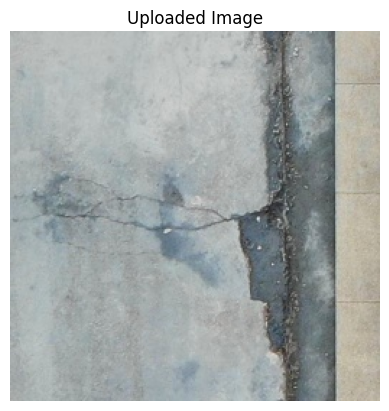

GPU Usage before inference:
{'memory_total': 15360.0, 'memory_used': 287.0, 'memory_utilization': 1.8684895833333333, 'temperature': 67.0}

0: 640x640 1 D10, 9.9ms
Speed: 3.6ms preprocess, 9.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
Detection Results:


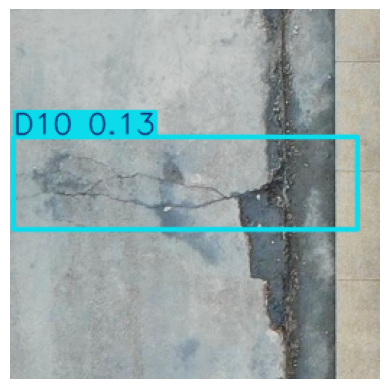

GPU Usage after inference:
{'memory_total': 15360.0, 'memory_used': 287.0, 'memory_utilization': 1.8684895833333333, 'temperature': 67.0}


KeyError: 'gpu_utilization'

In [29]:
import time
from ultralytics import YOLO  # type: ignore
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import GPUtil
import torch

# Function to check GPU status using GPUtil
def get_gpu_usage():
    gpus = GPUtil.getGPUs()
    usage = []
    for gpu in gpus:
        usage.append({
            "memory_total": gpu.memoryTotal,
            "memory_used": gpu.memoryUsed,
            "gpu_utilization": gpu.utilization,
            "memory_utilization": gpu.memoryUtil * 100,
            "temperature": gpu.temperature
        })
    return usage[0] if usage else {}

# Calculate GPU Efficiency
def calculate_gpu_efficiency(gpu_usage, inference_time):
    gpu_utilization = gpu_usage["gpu_utilization"]
    memory_utilization = gpu_usage["memory_utilization"]

    # Efficiency formula: (GPU utilization * Memory utilization) / Inference time
    if inference_time > 0:
        efficiency = (gpu_utilization / 100) * (memory_utilization / 100) / inference_time * 100
        return efficiency
    else:
        return 0

# Path to the YOLO model weights in the environment
model_weights_path = "runs/detect/train/weights/best.pt"
model = YOLO(model_weights_path)

# Manually specify the image path
image_path = "/content/datasets/datasets/valid/images/China_Drone_000004.jpg"  # Replace with the path to your image file

# Check if the file exists
if os.path.exists(image_path):
    # Read the image from the specified path
    image = Image.open(image_path)
    image = np.array(image)  # Convert to NumPy array

    # Ensure the image is in BGR format (YOLO uses BGR)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Display the uploaded image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Uploaded Image")
    plt.axis("off")
    plt.show()

    # Display GPU usage before inference
    gpu_usage_before = get_gpu_usage()
    print("GPU Usage before inference:")
    print(gpu_usage_before)

    # Record start time for inference
    start_time = time.time()

    # Perform inference with YOLO
    results = model(image, conf=0.12)

    # Record end time for inference
    end_time = time.time()
    inference_time = end_time - start_time

    # Display results
    print("Detection Results:")
    if len(results) > 0:
        for r in results:
            # Plot and display predictions using Matplotlib
            plotted_image = r.plot()
            plt.imshow(cv2.cvtColor(plotted_image, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.show()
    else:
        print("No detections found.")

    # Display GPU usage after inference
    gpu_usage_after = get_gpu_usage()
    print("GPU Usage after inference:")
    print(gpu_usage_after)

    # Calculate GPU Efficiency
    gpu_efficiency = calculate_gpu_efficiency(gpu_usage_after, inference_time)
    print(f"GPU Efficiency: {gpu_efficiency:.2f} %")

else:
    print(f"Image not found at {image_path}")



In [25]:
!pip install gputil


  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=d1e2c72d737e9de20a6f5081319450bbc8e7edb6593df4a4bb9a7a8cdd8d08a3
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil


In [30]:
import torch
print(torch.cuda.is_available())  # Should return True if a CUDA-enabled GPU is available


True


In [31]:
def get_gpu_usage():
    gpus = GPUtil.getGPUs()
    if len(gpus) == 0:
        print("No GPUs found.")
        return {}

    usage = []
    for gpu in gpus:
        print(f"GPU {gpu.id}: {gpu.name}")
        usage.append({
            "memory_total": gpu.memoryTotal,
            "memory_used": gpu.memoryUsed,
            "gpu_utilization": gpu.utilization,
            "memory_utilization": gpu.memoryUtil * 100,
            "temperature": gpu.temperature
        })
    return usage[0] if usage else {}


In [32]:
import torch

def get_gpu_usage():
    if torch.cuda.is_available():
        device = torch.device('cuda')
        memory_allocated = torch.cuda.memory_allocated(device) / 1024**2  # In MB
        memory_cached = torch.cuda.memory_reserved(device) / 1024**2  # In MB
        utilization = torch.cuda.get_device_properties(device).total_memory / 1024**2  # In MB
        utilization_percentage = (memory_allocated / utilization) * 100
        return {
            "memory_total": utilization,
            "memory_used": memory_allocated,
            "gpu_utilization": utilization_percentage,
            "memory_utilization": (memory_allocated / memory_cached) * 100 if memory_cached > 0 else 0
        }
    else:
        print("No CUDA-capable GPU detected")
        return {}


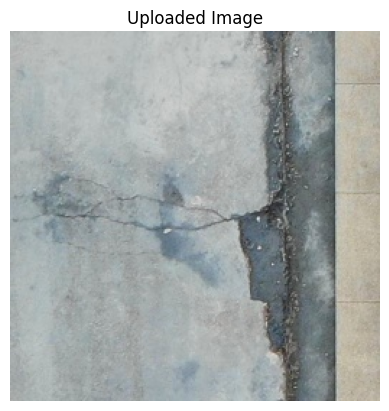

GPU 0: Tesla T4
GPU Usage before inference:
{'memory_total': 15360.0, 'memory_used': 287.0, 'gpu_utilization': 0.0, 'memory_utilization': 1.8684895833333333, 'temperature': 70.0}

0: 640x640 1 D10, 11.3ms
Speed: 3.3ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Detection Results:


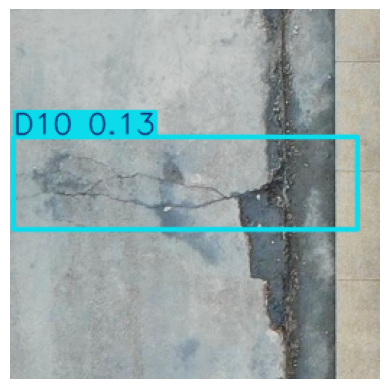

GPU 0: Tesla T4
GPU Usage after inference:
{'memory_total': 15360.0, 'memory_used': 287.0, 'gpu_utilization': 7.000000000000001, 'memory_utilization': 1.8684895833333333, 'temperature': 70.0}
GPU Efficiency: 0.75 %


In [34]:
import time
from ultralytics import YOLO  # type: ignore
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import GPUtil
import torch

# Function to check GPU status using GPUtil
def get_gpu_usage():
    gpus = GPUtil.getGPUs()
    if len(gpus) == 0:
        print("No GPUs found.")
        return {}

    usage = []
    for gpu in gpus:
        print(f"GPU {gpu.id}: {gpu.name}")
        # Use memory stats and temperature if utilization is unavailable
        usage.append({
            "memory_total": gpu.memoryTotal,
            "memory_used": gpu.memoryUsed,
            "gpu_utilization": gpu.load * 100,  # Use `load` instead of `utilization`
            "memory_utilization": gpu.memoryUtil * 100,
            "temperature": gpu.temperature
        })
    return usage[0] if usage else {}

# Fallback: Check GPU stats using torch if GPUtil fails
def get_gpu_usage_fallback():
    if torch.cuda.is_available():
        device = torch.device('cuda')
        memory_allocated = torch.cuda.memory_allocated(device) / 1024**2  # In MB
        memory_cached = torch.cuda.memory_reserved(device) / 1024**2  # In MB
        total_memory = torch.cuda.get_device_properties(device).total_memory / 1024**2  # In MB
        utilization_percentage = (memory_allocated / total_memory) * 100
        return {
            "memory_total": total_memory,
            "memory_used": memory_allocated,
            "gpu_utilization": utilization_percentage,
            "memory_utilization": (memory_allocated / memory_cached) * 100 if memory_cached > 0 else 0
        }
    else:
        print("No CUDA-capable GPU detected")
        return {}

# Calculate GPU Efficiency
def calculate_gpu_efficiency(gpu_usage, inference_time):
    gpu_utilization = gpu_usage["gpu_utilization"]
    memory_utilization = gpu_usage["memory_utilization"]

    # Efficiency formula: (GPU utilization * Memory utilization) / Inference time
    if inference_time > 0:
        efficiency = (gpu_utilization / 100) * (memory_utilization / 100) / inference_time * 100
        return efficiency
    else:
        return 0

# Path to the YOLO model weights in the environment
model_weights_path = "runs/detect/train/weights/best.pt"
model = YOLO(model_weights_path)

# Manually specify the image path
image_path = "/content/datasets/datasets/valid/images/China_Drone_000004.jpg"  # Replace with the path to your image file

# Check if the file exists
if os.path.exists(image_path):
    # Read the image from the specified path
    image = Image.open(image_path)
    image = np.array(image)  # Convert to NumPy array

    # Ensure the image is in BGR format (YOLO uses BGR)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Display the uploaded image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Uploaded Image")
    plt.axis("off")
    plt.show()

    # Display GPU usage before inference
    gpu_usage_before = get_gpu_usage()
    if not gpu_usage_before:
        gpu_usage_before = get_gpu_usage_fallback()
    print("GPU Usage before inference:")
    print(gpu_usage_before)

    # Record start time for inference
    start_time = time.time()

    # Perform inference with YOLO
    results = model(image, conf=0.12)

    # Record end time for inference
    end_time = time.time()
    inference_time = end_time - start_time

    # Display results
    print("Detection Results:")
    if len(results) > 0:
        for r in results:
            # Plot and display predictions using Matplotlib
            plotted_image = r.plot()
            plt.imshow(cv2.cvtColor(plotted_image, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.show()
    else:
        print("No detections found.")

    # Display GPU usage after inference
    gpu_usage_after = get_gpu_usage()
    if not gpu_usage_after:
        gpu_usage_after = get_gpu_usage_fallback()
    print("GPU Usage after inference:")
    print(gpu_usage_after)

    # Calculate GPU Efficiency
    gpu_efficiency = calculate_gpu_efficiency(gpu_usage_after, inference_time)
    print(f"GPU Efficiency: {gpu_efficiency:.2f} %")

else:
    print(f"Image not found at {image_path}")

